In [2]:
import pandas as pd
import os
import IPython.display as ipd

In [5]:
data_path = r"E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train"

train_csv = os.path.join(data_path, r"train.csv")
df = pd.read_csv(train_csv, encoding='utf-8')


In [6]:
audio_path = os.path.join(data_path, os.path.join(r"audio", df.iloc[1]['file_path']))
print(audio_path)
ipd.Audio(audio_path, autoplay=True)

E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train\audio\bed/00f0204f_nohash_1.wav


In [21]:
import scipy.io
from scipy.io import wavfile

# Read one of the voice command clips using scipy.
samplerate, data = wavfile.read(audio_path)

# the array of samples and sampling rate.
print(f"sample rate = {samplerate}")
print(f"raw data = {data}")
print(f"raw data shape = {data.shape}")
#print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

sample rate = 16000
raw data = [-12 -15 -15 ...  30  16  22]
raw data shape = (16000,)
length = 1.0s


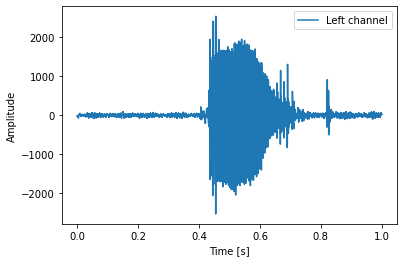

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the entire clip 
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

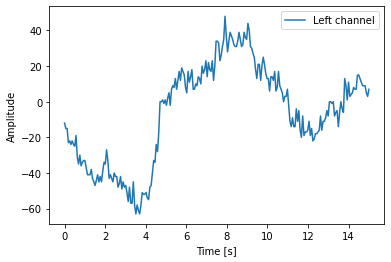

In [26]:
# Visualize a segment of 15 milliseconds
samples_15ms = int((samplerate * 15) / 1000)
length_15ms = 0.015
time_15ms = np.linspace(0., 15, samples_15ms)
plt.plot(time_15ms, data[0 : samples_15ms], label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

sample rate = 22050
raw data = [-0.00036606 -0.00048394 -0.00040867 ...  0.00054135  0.00061212
  0.00054082]
raw data shape = (22050,)
length = 1.0s


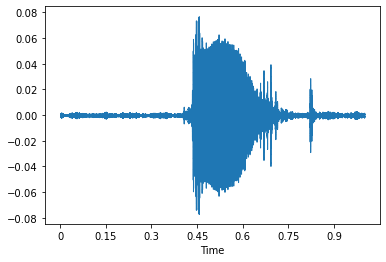

In [28]:
# Use librosa to load an audio clip from the dataset.
import librosa
import librosa.display

data, samplerate = librosa.load(audio_path)
print(f"sample rate = {samplerate}")
print(f"raw data = {data}")
print(f"raw data shape = {data.shape}")
#print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

librosa.display.waveshow(data, sr=samplerate)